<a href="https://colab.research.google.com/github/DanielDialektico/Machine-Learning/blob/main/Redes%20Neuronales/CNN_Clasificaci%C3%B3n_de_Prendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este apartado te presentaré un programa de **machine learning** de aprendizaje supervisado, en el que podrás observar cómo opera cada una de sus partes y cómo lleva a cabo su objetivo. Es un algoritmo que utiliza **redes neuronales artificiales** para clasificar imágenes de ropa de acuerdo a **10 clases** diferentes: <br>
<br>
<table>
  <tr>
    <th>Nombre de la prenda (salida)</th>
  </tr>
  <tr>
    <td>Playera/Blusa</td>
  </tr>
  <tr>
    <td>Pantalón</td>
  </tr>
    <tr>
    <td>Suéter</td>
  </tr>
    <tr>
    <td>Vestido</td>
  </tr>
    <tr>
    <td>Abrigo</td>
  </tr>
    <tr>
    <td>Sandalia</td>
  </tr>
    <tr>
    <td>Camisa</td>
  </tr>
    <tr>
    <td>Zapato/Tenis</td>
  </tr>
    <tr>
    <td>Bolsa</td>
  </tr>
    <tr>
    <td>Botín</td>
  </tr>
</table><br>
<br>
Este código, a diferencia de los demás códigos que utilizaremos en [el curso](https://dialektico.com/cursoml/) (que son códigos propios) es un ejemplo extraído del repositorio oficial de [Tensorflow](https://www.tensorflow.org/) que he **simplificado y traducido** para su mejor comprensión. 

Las imágenes utilizadas para entrenar este algoritmo provienen del set de datos de **Fashion MNIST**, el cual contiene más de 70,000 imágenes de las categorías antes mencionadas. Son de resolución baja y se pueden observar de forma general en la siguiente imagen: 
<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

# 1. Conjunto de datos y entrenamiento de la red

En este primer bloque vamos a **descargar el conjunto de datos** y entrenar una **red neuronal artificial** que aprenderá a clasificar cada imagen de acuerdo a una de las 10 categorías. 

Ejecuta el código y debajo observarás la descarga de información y las épocas correspondientes al **entrenamiento del algoritmo**, el cual mejora su **capacidad de clasificación** conforme cada ciclo. Esto es un claro ejemplo de **aprendizaje supervisado**, en el que apartir de un grupo de ***entradas*** (imágenes de prendas), cada una etiquetada con su nombre (***salidas***), la computadora aprende a identificar cada una de ellas.  

No te preocupes por entender cada parte del código, ya lo aprenderás a su tiempo. Solo pon atención en las partes que te estaré señalando. 

**Recordatorio**: *para ejecutar los bloques de código solo debes colocar el cursor sobre los corchetes situados al principio de cada bloque y pulsar sobre el símbolo de "reproducir".*

**Ejecuta el siguiente bloque**:

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#Se descarga el conunto de datos
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Se definen los nombres de cada categoría
class_names = ['Playera/Blusa', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapato/tenis', 'Mochila', 'Botín']

#Se normalizan los datos:
train_images = train_images / 255.0

test_images = test_images / 255.0

#Se define el modelo de redes neuronales artificiales.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#Se compila el modelo y se pide la impresión de la precisión como forma de medición de sus resultados.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nPrecisión de predicción:', test_acc)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5037 - accuracy: 0.8226
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3806 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3380 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3160 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2969 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2827 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2708 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2587 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2499 - accuracy: 0.9069
Epoch 10/10
1875/18

Después de ejecutarse, la última línea impresa por el código debe mostrar un **aproximado de 88% de precisión de predicción**. Para mejorar esta métrica podemos hacer algunas adecuaciones, como utilizar **redes neuronales convolucionales** o ajustar **hyperparámetros**, pero de esto hablaremos luego. Por el momento, el modelo ha sido entrenado y vamos a intentar realizar una predicción utilizando una imagen nueva. 

# 2. Haciendo predicciones

Al ejecutar el siguiente bloque de código le darás una imagen al algoritmo, este la procesará y nos dirá qué "piensa" que es. 

Una vez que termine, verás desplegada la imagen, en la parte superior podrás observar **el nombre que le ha dado nuestra red neuronal artificial**, y un porcentaje, el cual es la **probabilidad que la red otorga a ese objeto de llamarse con la clase que le ha asignado** (en este caso, la probabilidad de que la imagen sea un botín).

**Ejecuta el siguiente bloque para ver el resultado:**

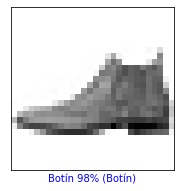

In [ ]:

#Se realizan las predicciones con nuevas imágenes.
predictions = model.predict(test_images)

#Se definen funciones para el despliegue de la imagen testeada, junto a su probabilidad de categorización estimada.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.plot
plot_image(i, predictions[i], test_labels, test_images)

El **porcentaje de predicción** mostrado debajo de la imagen, debería ser de entre 90 y 100%. Es decir, el algoritmo tiene ese porcentaje de seguridad de que se la imagen es un botín. El primer nombre que aparece es el que **predijo nuestra red**, mientras que el segundo, el que está entre paréntesis, corresponde a su *nombre verdadero*, en este caso ambos son iguales, es decir, nuestro algoritmo **acertó en su predicción**.

Probemos ahora con una imagen diferente, una de un zapato:

**Ejecuta el bloque:**

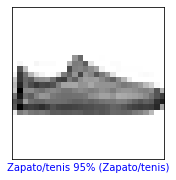

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.show()

En este caso la **precisión de predicción es más baja**. De hecho, dependiendo de cómo se entrenó tu red puede que esta haga una predicción errónea, he observado que en veces clasifica la imagen como una sandalia, o como un zapato.

# Evalúa el modelo con más imágenes

En este último bloque te mostraré un **conjunto de imágenes identificadas por nuestro algoritmo**. Evalúa su capacidad de predicción y observa los diversos resultados, aquellos que estén en letras rojas representan imágenes mal etiquetadas por el algoritmo.
Notarás que pocas veces se equivoca:

**Ejecuta el bloque:**

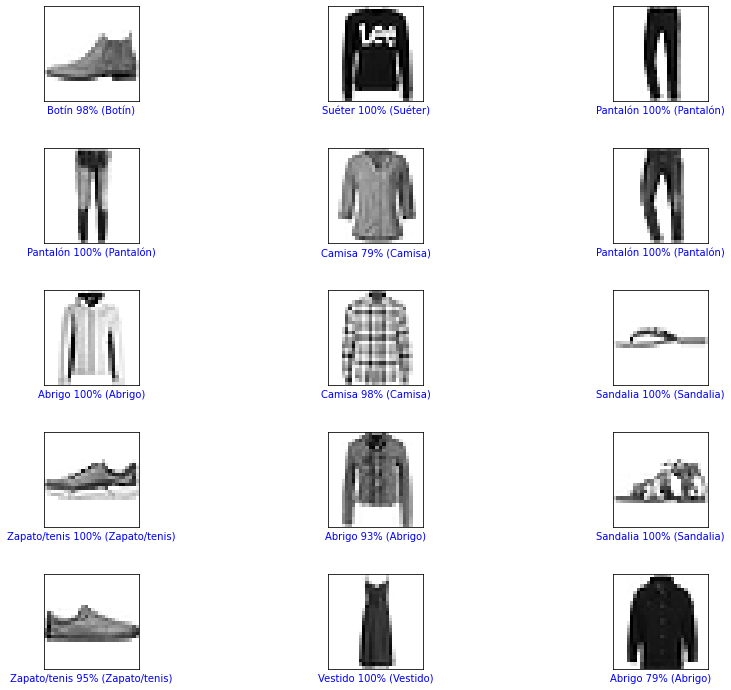

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()

Notarás que la mayoría de las imágenes fueron clasificadas de forma exitosa. si no es que todas. 
Con esto concluye nuestro primer acercamiento a un **algoritmo de aprendizaje supervisado**, en este caso, una **red neuronal artificial**, también conocida como **perceptrón o perceptrón multicapa**. Recuerda que esto es solo ilustrativo, si deseas conocer a fondo el funcionamiento de cada parte del modelo, continúa con las [lecciones del curso](https://dialektico.com/cursoml/).

In [ ]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.